# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** Maciej Pałka

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [2]:
# ===== Twoja implementacja tutaj =====
def f1(x):
    return np.sign(x)*x+x**2

def f2(x):
    return np.sign(x)*x**2

def f3(x):
    return np.abs(np.sin(5*x))**3

def f4_1(x):
    return 1/(1+1*x**2)

def f4_25(x):
    return 1/(1+25*x**2)

def f4_100(x):
    return 1/(1+100*x**2)

def f5(x):
    return np.sign(x)

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


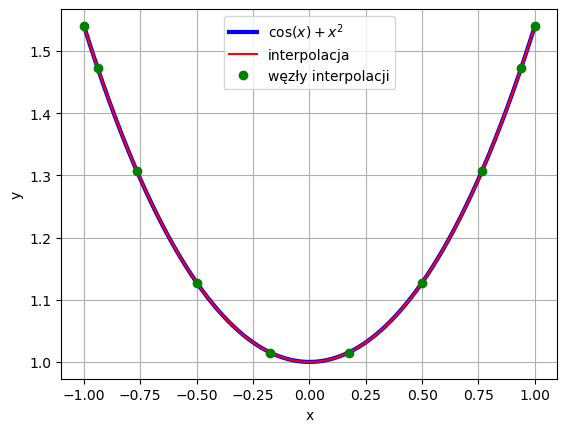

In [ ]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

700 µs ± 37 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)


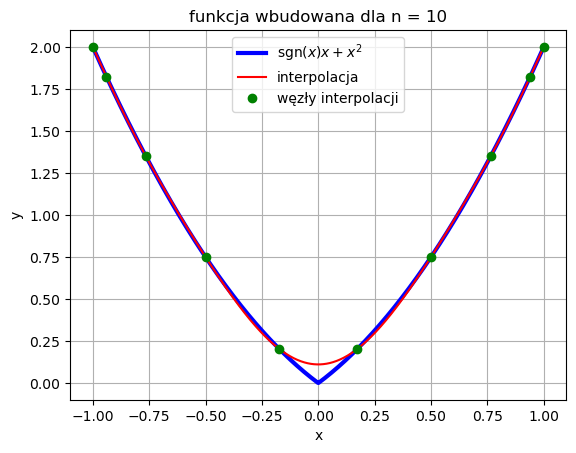

5.68 ms ± 192 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)


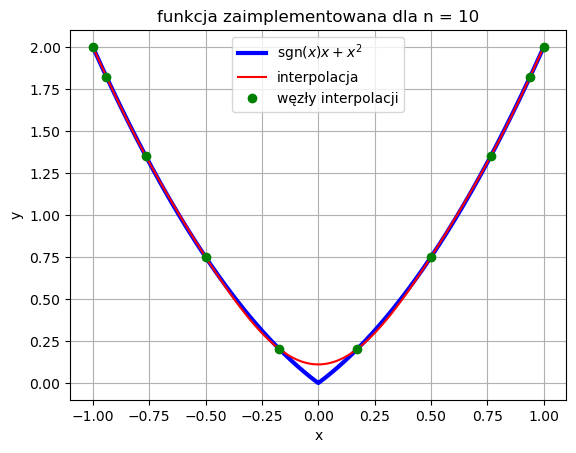

2.14 ms ± 13.8 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)


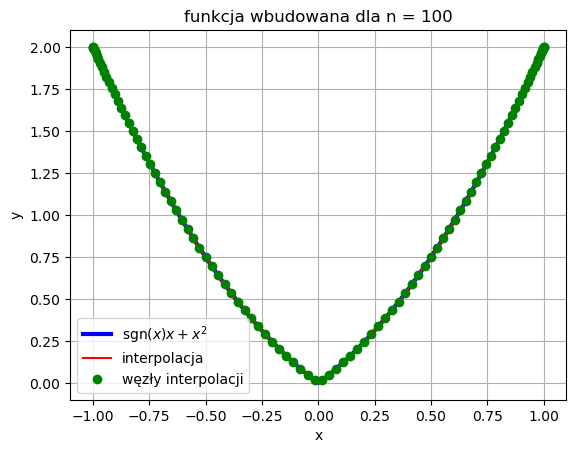

5.71 ms ± 162 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)


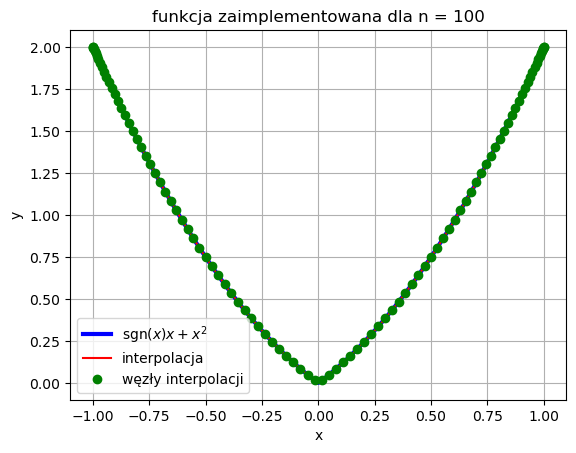

31.3 ms ± 244 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)


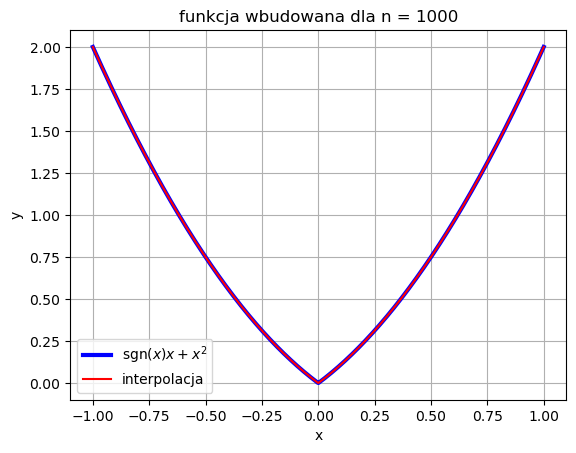

17.6 ms ± 11.4 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)


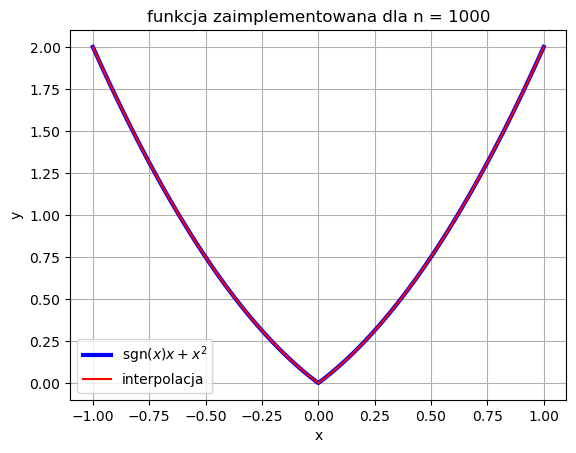

876 ms ± 8.85 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


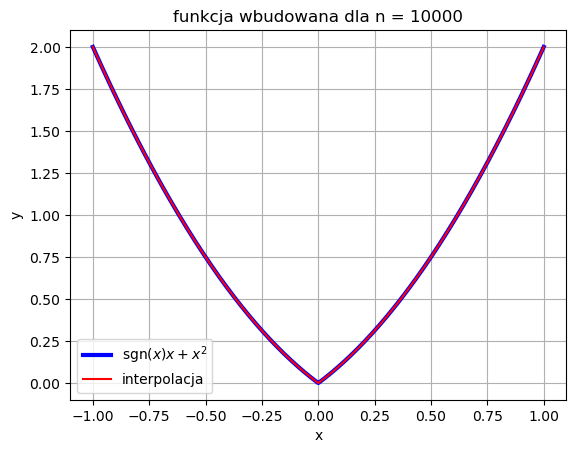

118 ms ± 1.66 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


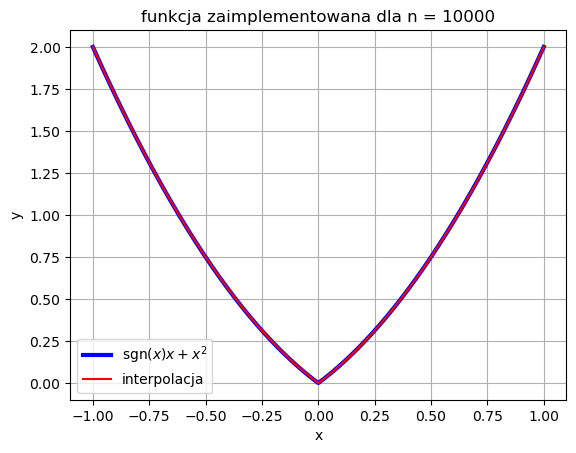

[0.0006995499992626719, 0.0021401200006948783, 0.03132871999987401, 0.8755536299991945]


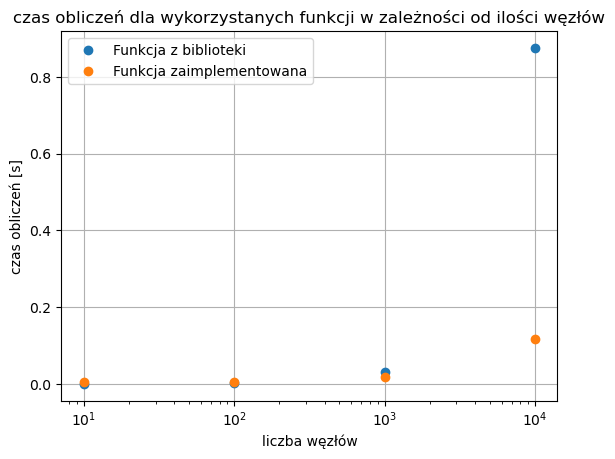

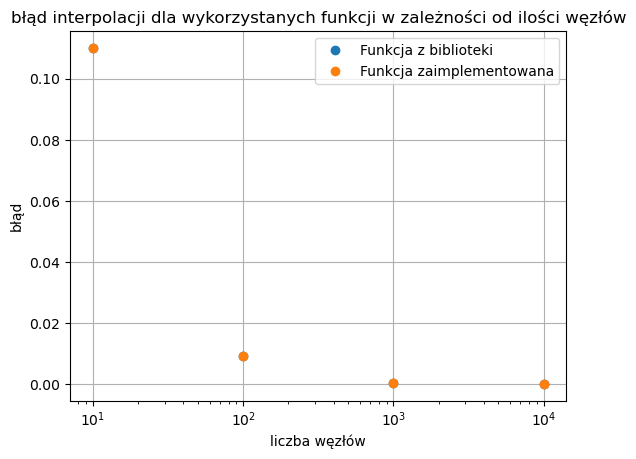

In [45]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
nodes = [10, 100, 1000, 10000] # tylko do 10e4, bo obliczenia dla 10e5 zajmowały za dużo czasu
scipy_time = []
implemented_time = []

error_scipy = []
error_implemented = []

for i in nodes:
    xch = main.chebyshev_nodes(i)

    # Interpoalcja
    yimp = sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    if i == 100000:
        time = %timeit -r 1 -n 1 -o sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    else:
        time = %timeit -r 2 -n 5 -o sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    scipy_time.append(time.average)
    error_scipy.append(main.L_inf(f1(x), yimp))

    plt.figure()
    plt.plot(x, f1(x), 'b', linewidth=3, label='$\mathrm{sgn}(x)x+x^2$')
    plt.plot(x, yimp, 'r', label='interpolacja')
    if i <= 100:
        plt.plot(xch, f1(xch), 'go', label='węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"funkcja wbudowana dla n = {i}")
    plt.legend(loc=0)
    plt.grid()
    plt.show()

    # funkcja zaimplementowana
    cheb_weight = main.bar_cheb_weights(i)
    yimp = main.barycentric_inte(xch, f1(xch), cheb_weight, x)
    if i == 100000:
        time = %timeit -r 1 -n 1 -o main.barycentric_inte(xch, f1(xch), cheb_weight, x)
    else:
        time = %timeit -r 2 -n 5 -o main.barycentric_inte(xch, f1(xch), cheb_weight, x)
    implemented_time.append(time.average)
    error_implemented.append(main.L_inf(f1(x), yimp))


    plt.figure()
    plt.plot(x, f1(x), 'b', linewidth=3, label='$\mathrm{sgn}(x)x+x^2$')
    plt.plot(x, yimp, 'r', label='interpolacja')
    if i <= 100:
        plt.plot(xch, f1(xch), 'go', label='węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"funkcja zaimplementowana dla n = {i}")
    plt.legend(loc=0)
    plt.grid()
    plt.show()

print(scipy_time)
# zestawienie czasu
fig, ax = plt.subplots()
ax.semilogx(nodes, scipy_time, 'o', label='Funkcja z biblioteki')
ax.semilogx(nodes, implemented_time, 'o', label='Funkcja zaimplementowana')
ax.set(title='czas obliczeń dla wykorzystanych funkcji w zależności od ilości węzłów', xlabel='liczba węzłów', ylabel='czas obliczeń [s]')
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.semilogx(nodes, error_scipy, 'o', label='Funkcja z biblioteki')
ax.semilogx(nodes, error_implemented, 'o', label='Funkcja zaimplementowana')
ax.set(title='błąd interpolacji dla wykorzystanych funkcji w zależności od ilości węzłów', xlabel='liczba węzłów', ylabel='błąd')
ax.grid()
ax.legend()

**Ad.**<br>
Wraz ze wzrostem rzędu interpolacji wartość błędów gwałtownie spada, co potwierdza poprawność obu metod dla funkcji ciągłej. Już dla 100 węzłów błąd jest bliski zeru, a dalsze zwiększanie liczby węzłów utrzymuje tą wysoką dokładność. Wyniki dla funkcji bibliotecznej i zaimplementowanej idealnie się pokrywają, co świadczy o ich numerycznej równoważności. <br>
<br>
Czas wykonywania obliczeń rośnie wraz ze zwiększaniem liczby węzłów, przy czym dla małych wartości n <= 1000 jest on pomijalnie mały dla obu metod. Dopiero przy 10000 węzłównastępuje wyraźny skok czasu obliczeń, gdzie funkcja zaimplementowana okazała się wydajniejsza od funkcji bibliotecznej.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

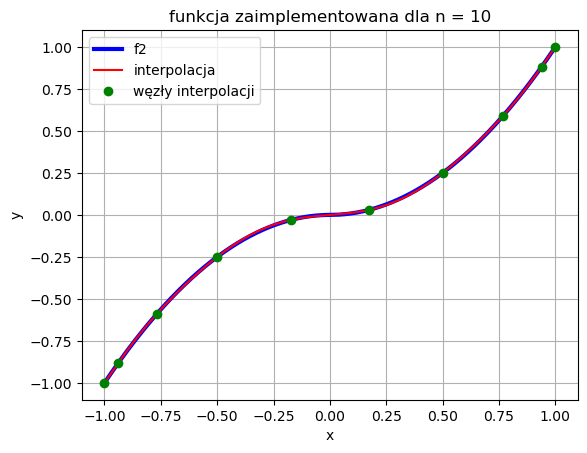

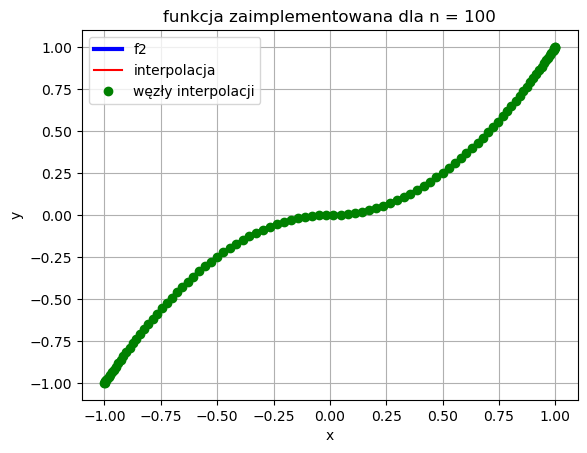

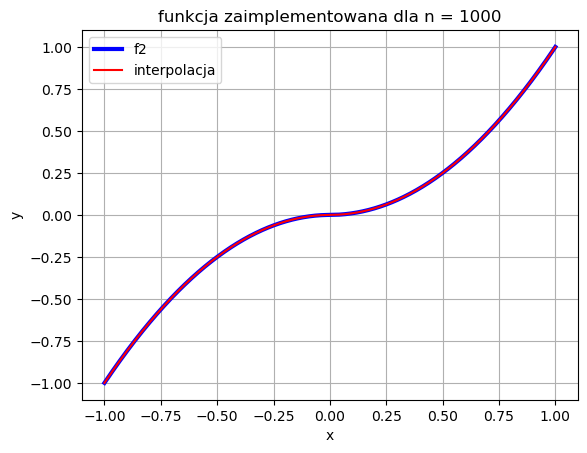

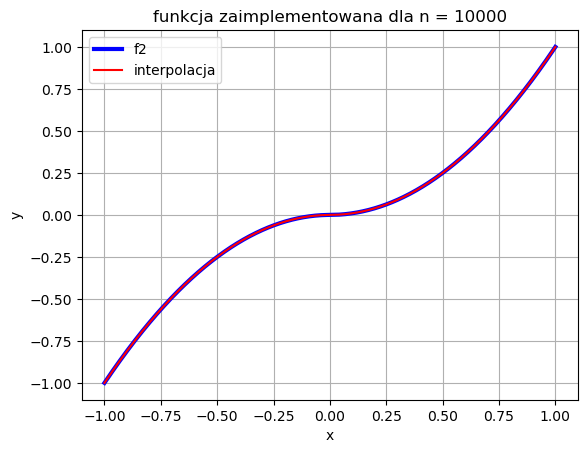

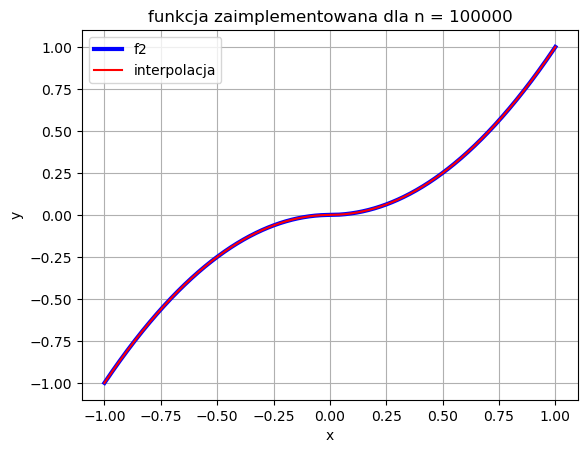

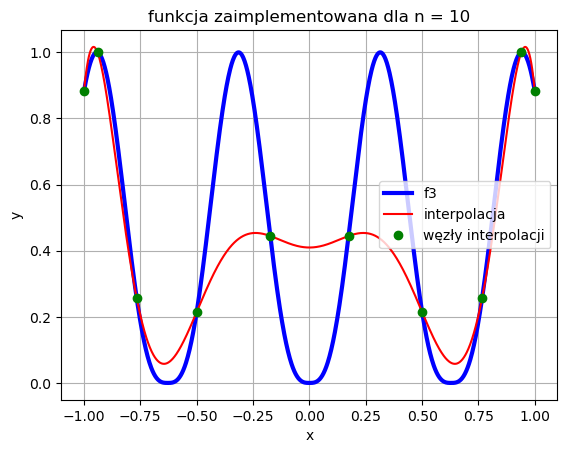

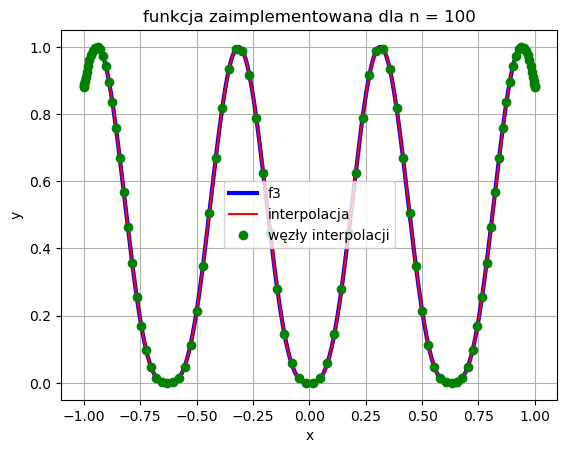

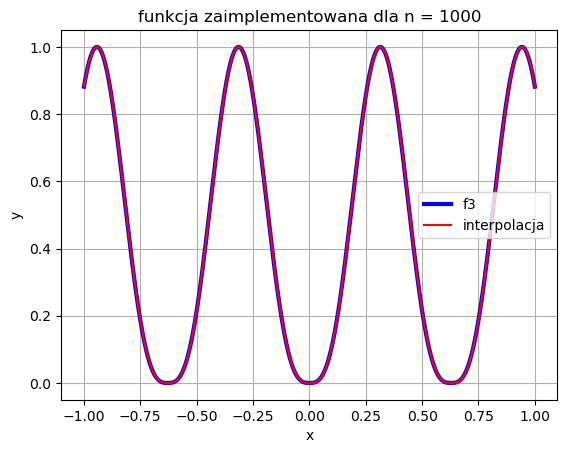

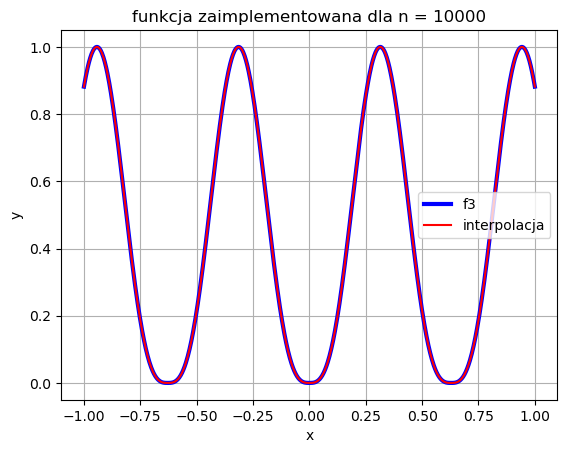

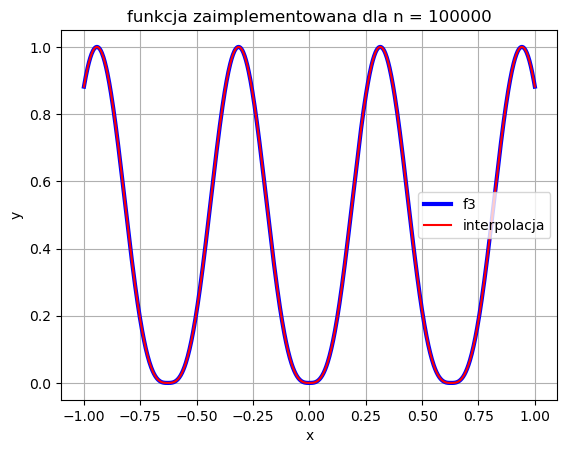

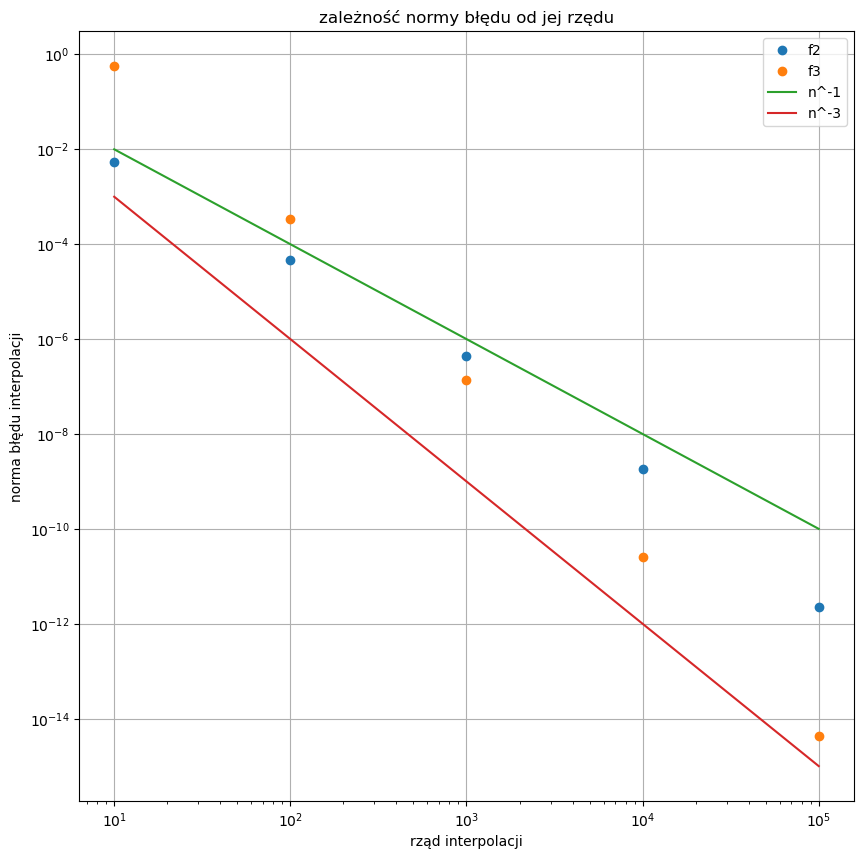

In [ ]:
# ===== Twoja implementacja tutaj =====
# analiza funkcji jednokrotnie różniczkowalnej
x = np.linspace(-1, 1, 1000)
nodes = [10, 100, 1000, 10000, 100000]

error_f2 = []
error_f3 = []

for i in nodes:
    xch = main.chebyshev_nodes(i)

    # funkcja zaimplementowana
    cheb_weight = main.bar_cheb_weights(i)
    yimp = main.barycentric_inte(xch, f2(xch), cheb_weight, x)
    error_f2.append(main.L_inf(f2(x), yimp))


    plt.figure()
    plt.plot(x, f2(x), 'b', linewidth=3, label='f2')
    plt.plot(x, yimp, 'r', label='interpolacja')
    if i <= 100:
        plt.plot(xch, f2(xch), 'go', label='węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"funkcja zaimplementowana dla n = {i}")
    plt.legend(loc=0)
    plt.grid()
    plt.show()

for i in nodes:
    xch = main.chebyshev_nodes(i)

    # funkcja zaimplementowana
    cheb_weight = main.bar_cheb_weights(i)
    yimp = main.barycentric_inte(xch, f3(xch), cheb_weight, x)
    error_f3.append(main.L_inf(f3(x), yimp))


    plt.figure()
    plt.plot(x, f3(x), 'b', linewidth=3, label='f3')
    plt.plot(x, yimp, 'r', label='interpolacja')
    if i <= 100:
        plt.plot(xch, f3(xch), 'go', label='węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"funkcja zaimplementowana dla n = {i}")
    plt.legend(loc=0)
    plt.grid()
    plt.show()

n_2 = [n ** -2 for n in nodes]
n_3 = [n ** -3 for n in nodes]
fig, ax = plt.subplots(figsize=(10,10))
ax.loglog(nodes, error_f2, 'o', label='f2')
ax.loglog(nodes, error_f3, 'o', label='f3')
ax.loglog(nodes, n_2, label='n^-1')
ax.loglog(nodes, n_3, label='n^-3')
ax.set(title='zależność normy błędu od jej rzędu',
xlabel='rząd interpolacji',
ylabel='norma błędu interpolacji')
ax.legend()
ax.grid()

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

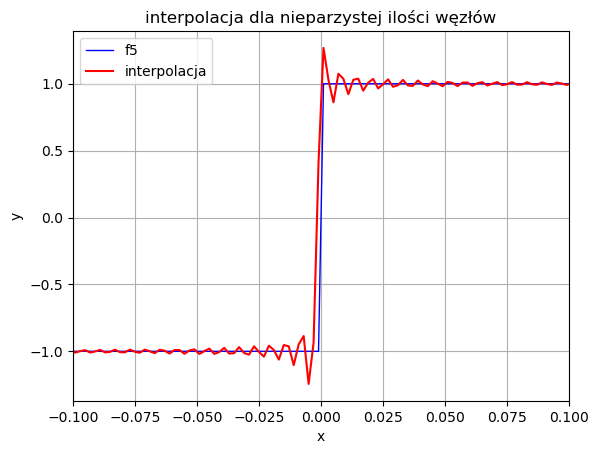

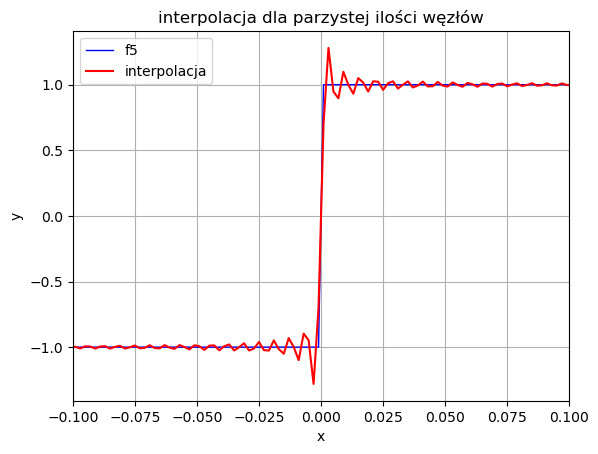

dla nieparzystej ilości węzłów wartość błędu wynosi:1.414559382927023
dla parzystej ilości węzłów wartość błędu wynosi:0.3024571386336844


In [41]:
# ===== Twoja implementacja tutaj =====
nodes = 1000
x = np.linspace(-1, 1, 1000)
x_odd = np.linspace(-1, 1, 1001)
x_even = np.linspace(-1, 1, 1000)

xch_odd = main.chebyshev_nodes(1001)
yimp_odd = sp.interpolate.barycentric_interpolate(xch_odd, f5(xch_odd), x)
plt.figure()
plt.plot(x, f5(x), 'b', linewidth=1, label='f5')
plt.plot(x, yimp_odd, 'r', label='interpolacja')       
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"interpolacja dla nieparzystej ilości węzłów")
plt.legend(loc=0)
plt.grid()
plt.xlim([-0.1, 0.1])
plt.show()

xch_even = main.chebyshev_nodes(1000)
yimp_even = sp.interpolate.barycentric_interpolate(xch_even, f5(xch_even), x)
plt.figure()
plt.plot(x, f5(x), 'b', linewidth=1, label='f5')
plt.plot(x, yimp_even, 'r', label='interpolacja')       
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"interpolacja dla parzystej ilości węzłów")
plt.legend(loc=0)
plt.grid()
plt.xlim([-0.1, 0.1])
plt.show()


err_o = main.L_inf(f5(x), yimp_odd)
err_e = main.L_inf(f5(x), yimp_even)

print(f'dla nieparzystej ilości węzłów wartość błędu wynosi:{err_o}')
print(f'dla parzystej ilości węzłów wartość błędu wynosi:{err_e}')




**Ad.2** <br>
Dla nieparzystych wartości n błąd nie dąży do 0, lecz stabilizuje się na wysokim poziomie, podczas gdy dla parzystych n amplituda jest trochę mniejsza. <br>
Różnica wynika z faktu, że przy n nieparzystym węzeł interpolacji wypada dokładnie w punkcie nieciągłości (x=0), co wymusza na wielomianie przyjęcie wartości 0 i powoduje gwałtowne oscylacje. <br>
Przy n parzystym węzły symetrycznie otaczają zero bez dotykania go, co pozwala wielomianowi na strome, ale gładsze przejście z -1 do 1.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)